# Mid-Term Quiz 2025

### Imports

In [2]:
import numpy as np # arrays, array operations
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import pymc as pm
import arviz as az

#preliz
!pip install preliz
import preliz as pz

### Getting Data

We will look at the BMI values of two groups - males and females.

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/refs/heads/main/Data/insurance.csv')
data

before = data.bmi[data.sex == 'female']
after = data.bmi[data.sex == 'male']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Examining Data

1. Plot the data

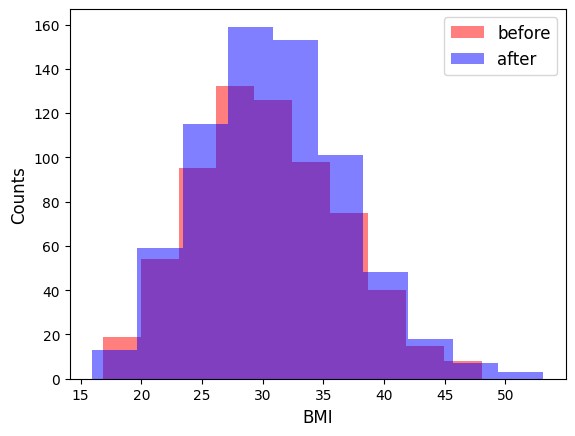

In [25]:
#1. answer
plt.hist(before, color = 'red', alpha = 0.5, label = 'before')
plt.hist(after, color = 'blue', alpha = 0.5, label = 'after')
plt.legend(loc = 'upper right', fontsize = 12)
plt.xlabel('BMI', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

### Model

We will model each group using a normal distribution.

In [29]:
categories = np.array(["male", "female"])
bmi = data["bmi"]
idx = pd.Categorical(data["sex"], categories=categories).codes

array([1, 0, 0, ..., 1, 1, 1], dtype=int8)

Model

In [33]:
#creating the model
coords = {"sex": categories, "sex_data":categories[idx]}

with pm.Model(coords=coords) as comparing_groups:
  m = pm.Normal("m", mu = 30, sigma = 10, dims="sex")
  sig = pm.HalfNormal("sig", sigma = 15, dims="sex")

  y = pm.Normal("y", mu=m[idx], sigma=sig[idx], observed = bmi, dims = "sex_data")

  idata_cg = pm.sample(1000, chains = 4)
  idata_cg.extend(pm.sample_posterior_predictive(idata_cg))

Output()

Output()

Posterior

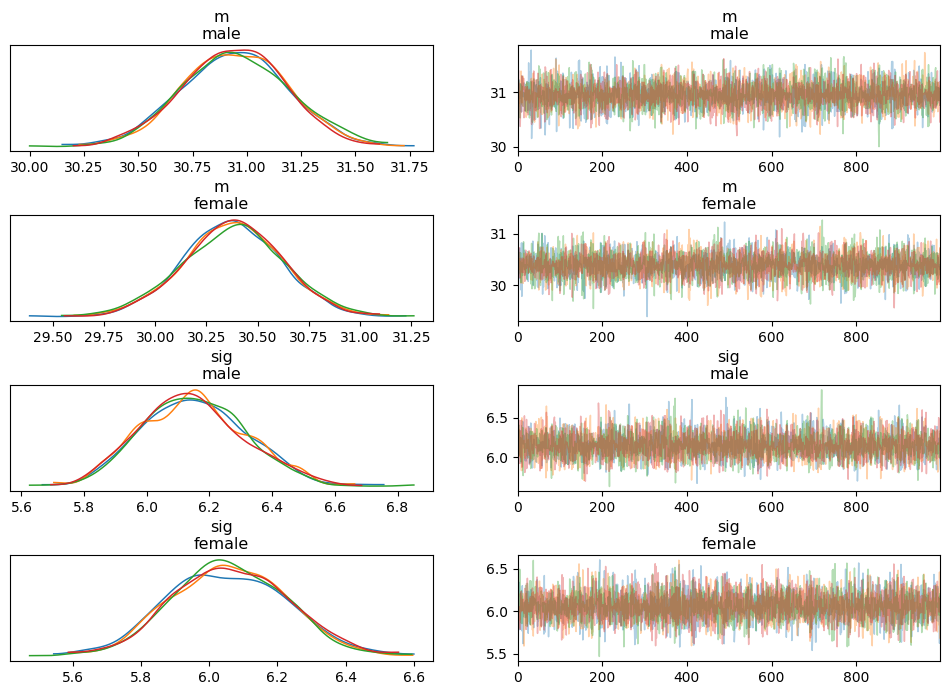

In [36]:
#trace data
az.plot_trace(idata_cg, compact = False)
plt.subplots_adjust(hspace=0.6)  # Increase spacing between subplots



Difference Between Posterior Means

Text(0.5, 1.0, 'BMI difference (Male - Female)')

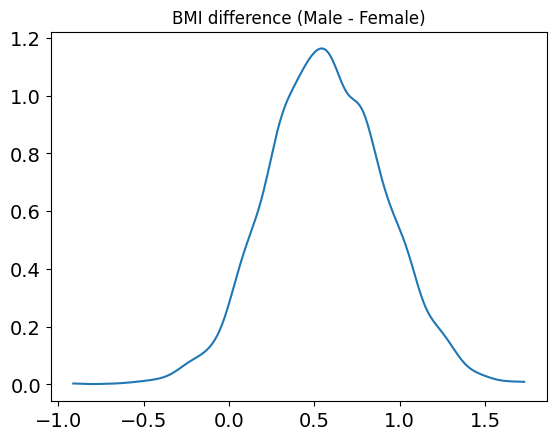

In [41]:
cg_posterior = az.extract(idata_cg)
means_diff = cg_posterior["m"].sel(sex='male') - cg_posterior['m'].sel(sex='female')
az.plot_dist(means_diff)
plt.title('BMI difference (Male - Female)')


Plot with HDI

<Axes: title={'center': 'x'}>

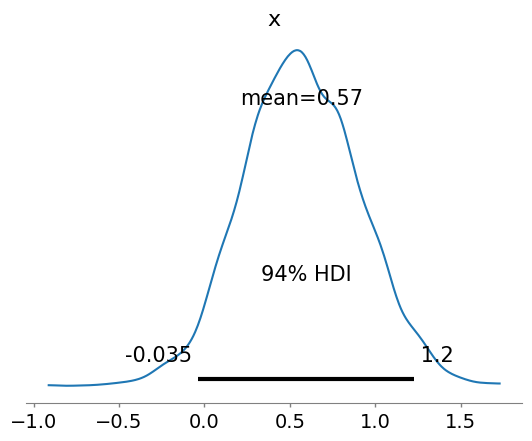

In [43]:
az.plot_posterior(means_diff.values)